# 5. (머신러닝을 하기 위한)데이터 전처리
- ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과가 크게 달라진다.
- 사이킷런의 ML알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항
1. 결손값, 즉 NaN, Null값은 허용되지 않는다. 이러한 Null값은 고정된 다른 값으로 변환해야 한다.
2. Null 값이 대부분인 경우 해당 feature는 드롭한다. Null값이 적은 경우 feature의 평균값 등으로 대체한다. 그 외의 정밀한 대체값으로 바꿀수도 있다.

- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 따라서 모든 문자열 값은 인코딩 후 숫자형으로 변환해야 한다.
- 카테고리형 피처는 코드 값으로 표현하는 게 더 이해하기 쉽다. 
- 텍스트형 피처는 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는 것이 더 좋다. data row를 식별하는 용도의 feature는 예측에 중요한 요소가 되기 힘들어 예측성능을 떨어뜨릴 가능성이 있기 때문이다. ex)주민번호. ID 등

##  데이터 인코딩 - 레이블 인코딩 & 원-핫 인코딩
- 레이블 인코딩: 문자열 값을 숫자형 category값으로 변환. LabelEncoder클래스로 구현한다. LabelEncoder를 객체로 생성 후 fit()과 transform()을 호출해 레이블 인코딩을 수행한다. 
- 원-핫 인코딩: LabelEncoding 후에 원-핫 인코딩을 수행한다

In [5]:
### 레이블 인코딩

from sklearn.preprocessing import LabelEncoder

items = ["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","믹서","믹서"]

# LabelEncoder를 객체로 생성한 후 fit()과 transform으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print("인코딩 변환값",labels)
print("인코딩 클래스", encoder.classes_) # 출력된 값은 순서대로 0,1,2,3....의 인코딩 변환값을 가진다

인코딩 변환값 [0 1 4 5 3 3 2 2]
인코딩 클래스 ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [21]:
### 원-핫 인코딩 - OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","믹서","믹서"]

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환한다
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
#2차원 데이터로 변환합니다
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("원-핫 인코딩 데이터")
print(oh_labels.toarray()) ##### toarray를 하지 않으면 1인 인덱스가 출력된다. 그 외는 0
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
### 원-핫 인코딩 - pd.get_dummies()

In [28]:
import pandas as pd
df = pd.DataFrame({'items' :["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","믹서","믹서"]}) # column이 하나인 array
print(df)
pd.get_dummies(df) #  => df자체는 변환되는 것 아님

   items
0     TV
1    냉장고
2  전자레인지
3    컴퓨터
4    선풍기
5    선풍기
6     믹서
7     믹서


,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화
- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다. 피처 스케일링에는 표준화와 정규화가 있다.
1. 표준화(Standradization) : 평균0,분산1 인 가우시안 정규분포를 가진 값으로 변환하는 것. - StandatdScaler()
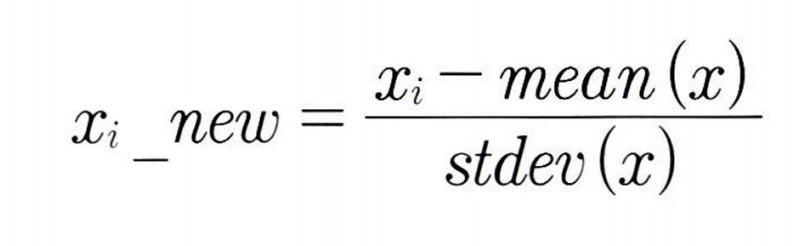
2. 정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환. 데이터가 가우시안 정규분포가 아닐 때 사용. 음수 값이 있을 때는 -1에서 1으로 변환한다 - MinMaxScaler()
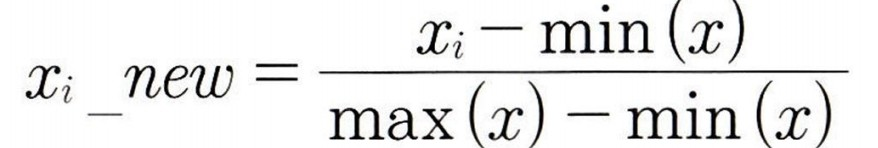

In [31]:
### 표준화 및 정규화를 위해 iris dataset 가져오기
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data,columns= iris.feature_names)

print('features의 평균 값')
print(iris_df.mean())
print('features의 분산값')
print(iris_df.var())

features의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
features의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


#### 표준화 - StandardScaler()

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # StandardScaler의 객체 생성
scaler.fit(iris_df) #  데이터 세트로 StandardScaler fitting
iris_scaled = scaler.transform(iris_df)  # iris_df를 transform()한 값 반환

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환해야 한다.
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns = iris.feature_names)
print('features의 평균 값')
print(iris_df_scaled.mean()) # 0에 수렴
print('\nfeatures의 분산값')
print(iris_df_scaled.var())  # 1에 수렴

features의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

features의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 정규화 - MinMaxScaler()

In [38]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()  # MinMaxScaler 객체 생성
scaler.fit(iris_df)  #  데이터 세트를 기반으로 MinMaxScaler fitting
iris_scaled = scaler.transform(iris_df)  # iris_df를 transform()한 값 반환

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환해야 한다.
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns = iris.feature_names)
print('features의 평균 값')
print(iris_df_scaled.min()) # 0에 수렴
print('\nfeatures의 분산값')
print(iris_df_scaled.max())  # 1에 수렴

features의 평균 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

features의 분산값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터 세트에 적용해야 한다.
- 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.
- 아래의 scaling에서 값은 값이어도 다르게 scaling됨을 알 수 있다

In [46]:
##################################### 이렇게 하면 안된다!!!!!!!#############################################

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상의 data만 가능하므로 reshape(-1,1)으로 차원을 변경한다
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# MinMaxSclaer 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale으로 train_array 데이터를 변환함. 원본 10 ->1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2)) # 0차원의 array로 만든다
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2)) # 0차원의 array로 만든다

### 이번에는 test데이터 세트를 변환한다
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)

# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))
###############################################################################################################

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


# 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df = pd.read_csv("C:/Users/JH/Desktop/ESAA/Titanic/train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
print("\n ### 학습 데이터 정보 ### \n")
print(titanic_df.info())  ### 로딩된 데이터 칼럼 타입 확인 가능


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [59]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(),inplace=True) # Null값을 해당 column의 평균으로 대체
titanic_df["Cabin"].fillna('N',inplace = True) # Null값을 해당 "N"으로 대체
titanic_df["Embarked"].fillna('N',inplace = True) # Null값을 해당 "N"으로 대체
print("데이터 세트 Null 값 개수 : ", titanic_df.isnull().sum().sum())  # sum 1번만 하면 각 column의 Null개수가 나온다
# sum을 두번 사용하여 전체 dataset에서의 Null값이 나오게 된다

데이터 세트 Null 값 개수 :  0


In [64]:
print('Sex 값 분포: \n', titanic_df["Sex"].value_counts())
print('\nCabin 값 분포: \n', titanic_df["Cabin"].value_counts())
print('\nEmbarked 값 분포: \n', titanic_df["Embarked"].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
C45              1
D21              1
E49              1
C101             1
E46              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [75]:
# Cabin 속성의 앞문자만 뽑아내기 => 선실 등급만 보이게 한다
titanic_df["Cabin"]=titanic_df["Cabin"].str[:1]
print(titanic_df["Cabin"].head(3))

# 성별에 따른 생존자 수
titanic_df.groupby(["Sex","Survived"])["Survived"].count()

0    N
1    C
2    N
Name: Cabin, dtype: object


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

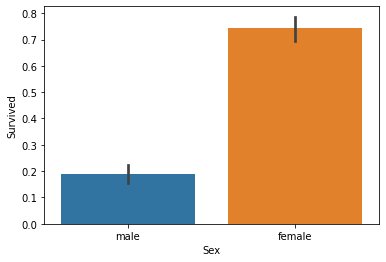

In [76]:
sns.barplot(x=titanic_df["Sex"],y=titanic_df["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

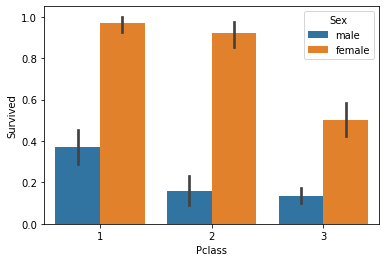

In [77]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=titanic_df)

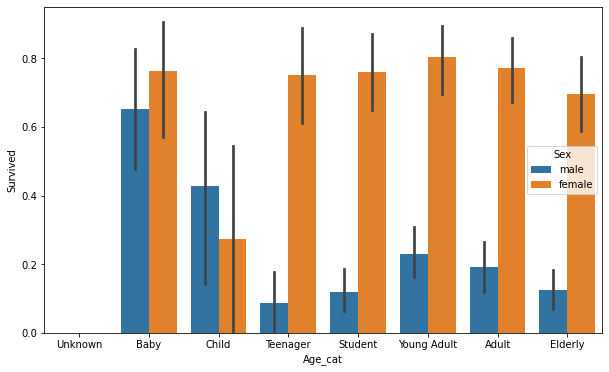

In [4]:
# Age를 categorical하게 분류한 후 나이별, 성별 Survive 그래프 그리기

# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names) # order= 를 통해서 원하는 순서대로 배엻할 수 있다
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [5]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [6]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수 - df["column명"].fillna(대체값, inplace=True)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) # Age의 Null값을 평균으로 대체 
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True) # 식별자 등 분류에 도움 안되는 변수 제거
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]    # Cabin의 값에서 n등석 값만 반환하여 다시 Cabin에 저장
    features = ['Cabin','Sex','Embarked']     # categorical 변수 목록
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출 => 이 함수 하나만으로 위의 함수들을 다 진행한다
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [16]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv("C:/Users/JH/Desktop/ESAA/Titanic/train.csv") 
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

# train, test split하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,test_size=0.2, random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def exec_kfold(clf, folds=5): # 폴드 세트가 folds만큼인 KFold객체를 생성. clf의 방식으로 모델을 classify한다.
    kfold = KFold(n_splits=folds)
    scores = []
    # KFold 교차 검증 수행 => enumerate를 이용해서 iter_count 와 (train_index,test_index)를 구한다
    # 원래 kfold만 쓰면 train_index과 test_index 만 구할 수 있지만 enumerate를 쓰면서 하나의 value로 묶이는듯하다
    # for문 반복시마다 iter_count=0 에서 1씩 증가하는 대신 이런 방법을 쓸 수 있다
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train)   
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     

    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
print('\n ### KFold 클래스 ###  \n')
exec_kfold(dt_clf , folds=5) 

print('\n ### StratifiedKFold 클래스 ###  \n')
scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))


 ### KFold 클래스 ###  

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823

 ### StratifiedKFold 클래스 ###  

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [35]:
from sklearn.model_selection import GridSearchCV

#dt_clf_new = DecisionTreeClassifier(random_state=11)
parameters = {'max_depth':[2,3,5,10], 'min_samples_split': [2,3,5], 'min_samples_leaf':[1,5,8]}

dt_clf= DecisionTreeClassifier(random_state=11)
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring ='accuracy', cv=5) #cv=5는 폴드 5개, 
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
